Create Manifest File (CSV) & K- FOld validation

In [ ]:
!ls

drive  sample_data


In [ ]:
!rm ./drive/MyDrive/*wav

In [ ]:
import os
import pandas as pd

In [ ]:
import os
for each in os.listdir("./drive/MyDrive"):
  if each =="Colab Notebooks":
    continue
  if each =="RPA_Data_Entry_Validation_Verification_v_4.0.doc":
    continue
  if each =="Language Identification":
    continue
  open(f"./drive/MyDrive/{each}", 'w').close() #overwrite and make the file blank instead - ref: https://stackoverflow.com/a/4914288/3553367
  os.remove(f"./drive/MyDrive/{each}")

In [ ]:
import os
os.remove("./filename")

In [ ]:
BASE = r"/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/data"

In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/sil_wav.rar').extractall('/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data')
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
os.listdir(BASE)

['in-en', 'hi']

In [ ]:
def create_manifest(BASE):
  temp_files = list()
  temp_label = list()

  for each_class in os.listdir(BASE):
    res_path = f"{BASE}/{each_class}"
    all_files = os.listdir(res_path)
    label = len(all_files)*[each_class]
    temp_files.extend(all_files)
    temp_label.extend(label)
  data = {"Name":temp_files, "Label":temp_label}
  df = pd.DataFrame(data)
  return df

In [ ]:
df = create_manifest(BASE)

In [ ]:
print(df.shape)
df.head()

(92484, 2)


,Name,Label
0,hyd_231_long_308_eng_18.wav,in-en
1,hyd_231_long_723_eng_2.wav,in-en
2,hyd_231_long_695_eng_12.wav,in-en
3,hyd_231_long_695_eng_16.wav,in-en
4,hyd_231_long_723_eng_8.wav,in-en


In [ ]:
df.Label.value_counts()

hi       51228
in-en    41256
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.3, random_state=42, stratify=df.Label)

In [ ]:
X_train

,Name,Label
8274,dli_341_long_972_eng_7.wav,in-en
83187,cdg_207_long_1217_hin_7.wav,hi
42862,mum_321_long_204_hin_13.wav,hi
39722,ahd_314_long_180_eng_7.wav,in-en
71090,hyd_581_long_92_hin_13.wav,hi
...,...,...
21496,blr_251_long_475_eng_8.wav,in-en
86009,bbs_432_long_76_hin_15.wav,hi
31640,bbs_435_long_173_eng_2.wav,in-en
8953,dli_346_long_495_eng_16.wav,in-en


In [ ]:
X_test

,Name,Label
30827,bbs_443_long_353_eng_18.wav,in-en
83908,bbs_464_long_288_hin_16.wav,hi
22216,blr_241_long_q_eng_221_eng_3.wav,in-en
61096,idr_92_long_66_hin_10.wav,hi
38238,ahd_318_long_383_eng_11.wav,in-en
...,...,...
91214,ahd_45_long_571_hin_4.wav,hi
86904,ahd_563_long_0482_hin_16.wav,hi
74617,hyd_180_long_1146_hin_16.wav,hi
39964,ahd_316_long_1085_eng_11.wav,in-en


In [ ]:
X_test.Label.value_counts()

hi       15369
in-en    12377
Name: Label, dtype: int64

In [ ]:
X_train.Label.value_counts()

hi       35859
in-en    28879
Name: Label, dtype: int64

In [ ]:
temp = df.copy()
df = X_train

In [ ]:
df.shape

(64738, 2)

In [ ]:
import json
import numpy as np
import pandas as pd

from sklearn import preprocessing 
from sklearn import model_selection

''' K - Fold validation '''

K = 5 # 5 Folds

df = df.sample(frac=1).reset_index(drop=True)

kf = model_selection.StratifiedKFold(n_splits=K)

df["k-fold"] = -1

for fold, (tra_, val_) in enumerate(kf.split(X = df, y = df.Label.values)):
  df.loc[val_,"k-fold"] = fold
  print(f'Fold No : {fold}, Training label count : {len(tra_)}, Validation label count : {len(val_)}')

''' Label Encoding '''

label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit(df['Label'])

KEY = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['Label_enc']= label_encoder.transform(df['Label'])
  
df['Label_enc'].unique()

# Handle int64 files
class npEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.int64):
            return int(obj)
        return json.JSONEncoder.default(self, obj)
        
with open(r'/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/label_key.json', 'w') as f:
    json.dump(KEY, f, cls=npEncoder) # Dumping Label_Key to be refered later
    print('Label Key dumped')

df.to_csv(r'/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/dataset_folds_split_less.csv', index=False)

Fold No : 0, Training label count : 51790, Validation label count : 12948
Fold No : 1, Training label count : 51790, Validation label count : 12948
Fold No : 2, Training label count : 51790, Validation label count : 12948
Fold No : 3, Training label count : 51791, Validation label count : 12947
Fold No : 4, Training label count : 51791, Validation label count : 12947
Label Key dumped


In [ ]:
X_test.to_csv(r'/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/X_test.csv', index=False)

In [ ]:
df["Label_enc"].value_counts()

0    35843
1    28895
Name: Label_enc, dtype: int64

In [ ]:
df["k-fold"].value_counts()

2    19507
1    19507
0    19507
4    19506
3    19506
Name: k-fold, dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/dataset_folds_split.csv")
df.head(3)

,Name,Label,k-fold,Label_enc
0,ahd_36_long_1377_hin_15.wav,hi,0,0
1,cdg_214_long_1303_hin_1.wav,hi,0,0
2,bbs_460_long_369_hin_1.wav,hi,0,0


In [ ]:
df.shape

(78026, 4)

In [ ]:
from tqdm import tqdm_notebook
import librosa

#BASE = r"/content/drive/MyDrive/Language Identification/New dataset/wav"
df["Duration"] = -1

for i in tqdm_notebook(df.index):
  array, sr = librosa.load(f"{BASE}/{df.Label[i]}/{df.Name[i]}")
  duration = librosa.get_duration(y=array, sr=sr)
  df["Duration"][i] = duration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Language Identification/16k new/dataset_folds.csv', index=False)

In [ ]:
df.head(2)

,Name,Label,k-fold,Label_enc
0,hindi_0909.wav,hi,0,1
1,telugu_s02_469.wav,en-in,0,0


In [ ]:
df.Duration.value_counts()

5     3066
4     2068
7     1403
3     1368
6      564
2      165
8      143
9       64
14      29
10      26
13      24
12      21
15      14
11      13
0       11
1       10
16       9
17       3
18       2
22       2
27       1
21       1
Name: Duration, dtype: int64

In [ ]:
df_filtered = df[(df['Duration'] >= 3)]

In [ ]:
df1 = df.copy()
df = df_filtered

In [ ]:
df.shape

(8821, 5)

In [ ]:
df.Label.value_counts()

en-in    6030
hi       2791
Name: Label, dtype: int64

In [ ]:
import json
import numpy as np
import pandas as pd

from sklearn import preprocessing 
from sklearn import model_selection

''' K - Fold validation '''

K = 5 # 5 Folds

df = df.sample(frac=1).reset_index(drop=True)

kf = model_selection.StratifiedKFold(n_splits=K)

df["k-fold"] = -1

for fold, (tra_, val_) in enumerate(kf.split(X = df, y = df.Label.values)):
  df.loc[val_,"k-fold"] = fold
  print(f'Fold No : {fold}, Training label count : {len(tra_)}, Validation label count : {len(val_)}')

''' Label Encoding '''

label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit(df['Label'])

KEY = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['Label_enc']= label_encoder.transform(df['Label'])
  
df['Label_enc'].unique()

# Handle int64 files
class npEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.int64):
            return int(obj)
        return json.JSONEncoder.default(self, obj)
        
with open(r'/content/drive/MyDrive/Language Identification/New dataset/label_key.json', 'w') as f:
    json.dump(KEY, f, cls=npEncoder) # Dumping Label_Key to be refered later
    print('Label Key dumped')

df.to_csv(r'/content/drive/MyDrive/Language Identification/New dataset/dataset_folds_filtered.csv', index=False)

Fold No : 0, Training label count : 7056, Validation label count : 1765
Fold No : 1, Training label count : 7057, Validation label count : 1764
Fold No : 2, Training label count : 7057, Validation label count : 1764
Fold No : 3, Training label count : 7057, Validation label count : 1764
Fold No : 4, Training label count : 7057, Validation label count : 1764
Label Key dumped


In [ ]:
df.Label.value_counts()

en-in    6139
hi       2868
Name: Label, dtype: int64

Training Pipeline


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/dataset_folds_split_less.csv")

In [ ]:
df.shape

(64738, 4)

In [ ]:
!pip install -q efficientnet_pytorch
!pip install -q catalyst
!pip install -q albumentations==0.4.5

In [ ]:
import os
import time

import pandas as pd

import warnings
from tqdm import tqdm_notebook

import torch
import torch.nn as nn
from torch.utils.data import Dataset

from efficientnet_pytorch import EfficientNet

from catalyst.data.sampler import BalanceClassSampler
from torch.utils.data.sampler import SequentialSampler

In [ ]:
import random
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)
SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)

BASE = r"/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/data"

## Get Model - EfficientNet B0

In [ ]:
"""class Net(nn.Module):
    
    def __init__(self, model_name = 'b0', classes = 2):
        super(Net, self).__init__()
        
        self._final_out_classes = classes
        
        self.model_name = f'efficientnet-{model_name}'
        self.model = EfficientNet.from_pretrained(self.model_name)
        self.model._fc = nn.Linear(in_features = self.model._fc.in_features, out_features = self._final_out_classes, bias = True)
        
    def forward(self, inp):
        bs = inp.size()[0]
        x = self.model.extract_features(inp)
        print(x)
        x = x.view(bs,-1)
        print(x)
        return x        
"""
print("Ignore")

Ignore


In [ ]:
def Net(model_name = 'b0', output = 2):
    model = EfficientNet.from_pretrained(f'efficientnet-{model_name}')
    model._fc = nn.Linear(in_features = model._fc.in_features, out_features = output, bias = True)
    return model

## Testing spectogram

In [ ]:
import librosa

In [ ]:
audio_data, fs = librosa.load(f"{BASE}/{df.loc[40].Label}/{df.loc[40].Name}", sr=None)

In [ ]:
len(audio_data)

40000

In [ ]:
5*fs

40000

In [ ]:
temp = np.zeros((1, int(5 * fs) - len(audio_data)))
joined_wav = np.concatenate((audio_data, temp[0]))

In [ ]:
import IPython.display as ipd

ipd.Audio(data=audio_data, autoplay=True, rate=fs)

In [ ]:
linear = librosa.stft(audio_data, n_fft=512, win_length=400, hop_length=160)

In [ ]:
x=librosa.magphase(linear.T)
x = np.log1p(x)
x = x.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


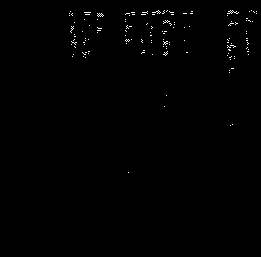

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(linear.astype('uint8'))

In [ ]:
def mono_to_color(X, eps=1e-6, mean=None, std=None):
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    X = (X - mean) / (std + eps)

    # Normalize to [0, 255]
    _min, _max = X.min(), X.max()

    if (_max - _min) > eps:
        V = np.clip(X, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)

    return V


def normalize(image, mean=None, std=None):
    image = image / 255.0
    if mean is not None and std is not None:
        image = (image - mean) / std
    return image.astype(np.float32)

In [ ]:
melspec = librosa.feature.melspectrogram(
            audio_data, sr=8000)
melspec = librosa.power_to_db(melspec)
melspec = mono_to_color(melspec)

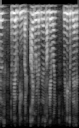

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(melspec)

In [ ]:
melspec.shape

(128, 93, 3)

## Utils

### Load audio files

In [ ]:
import librosa

def mono_to_color(X, eps=1e-6, mean=None, std=None):
    X = np.stack([X, X, X], axis=-1)
    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    X = (X - mean) / (std + eps)
    # Normalize to [0, 255]
    _min, _max = X.min(), X.max()

    if (_max - _min) > eps:
        V = np.clip(X, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)
    return V

def normalize(image, mean=None, std=None):
    image = image / 255.0
    if mean is not None and std is not None:
        image = (image - mean) / std
    return image.astype(np.float32)

def required_cut(audio_data, sr, cut):
  if len(audio_data) < int(cut * sr):
    temp = np.zeros((1, int(cut * sr) - len(audio_data)))
    joined_wav = np.concatenate((audio_data, temp[0]))
  
  if len(audio_data) > int(cut * sr):
    #start = np.random.randint(len(audio_data) - int(cut * sr))
    joined_wav = audio_data[0:0 + int(cut * sr)].astype(np.float32)
    
  else:
    joined_wav = audio_data
  return joined_wav

def load_audio(path, sr=8000, cut=5):
  audio_data, _ = librosa.load(path, sr=sr)
  audio_data = required_cut(audio_data, sr, cut)
  return audio_data

def get_spectogram(audio_data, sr=8000):
  melspec = librosa.feature.melspectrogram(audio_data, sr)
  melspec = librosa.power_to_db(melspec)
  melspec = mono_to_color(melspec)
  return melspec

### Testing

In [ ]:
audio_data = load_audio(f"{BASE}/{df.loc[1].Label}/{df.loc[1].Name}")
import IPython.display as ipd
ipd.Audio(data=audio_data, autoplay=True, rate=8000)

(128, 79, 3)


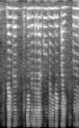

In [ ]:
a = get_spectogram(audio_data)

from google.colab.patches import cv2_imshow
import cv2

z = cv2.resize(a, (192,192))
print(a.shape)
cv2_imshow(a)

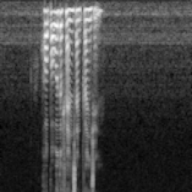

In [ ]:
cv2_imshow(z)

## Dataloader


In [ ]:

import albumentations as A
from albumentations.pytorch import ToTensorV2

def augmentations(img_size):
    return A.Compose([
            A.Resize(height=img_size, width=img_size, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)
    
class DatasetRetriever(Dataset):

    def __init__(self, audio_ids, labels, markings,is_train, transforms=None):
        super().__init__()
        self.audio_ids = audio_ids
        self.labels = labels
        self.markings = markings
        self.transforms = transforms
        self.is_train = is_train

    def __getitem__(self, idx: int):
        audio_id = self.audio_ids[idx]
        label = self.labels[idx]
        marking = self.markings[idx]
        audio_path = f"{BASE}/{label}/{audio_id}"
        audio_data = load_audio(audio_path)

        if self.is_train:
          audio_data = train_transform(audio_data)
        audio_spec = get_spectogram(audio_data)

        if self.transforms:
          sample = {'image': audio_spec}
          sample = self.transforms(**sample)
          audio_spec = sample['image']

        return audio_spec, marking

    def __len__(self) -> int:
        return self.audio_ids.shape[0]

    def get_labels(self):
        return list(self.labels)

In [ ]:
import numpy as np

class AudioTransform:
    def __init__(self, always_apply=False, p=0.5):
        self.always_apply = always_apply
        self.p = p

    def __call__(self, y: np.ndarray):
        if self.always_apply:
            return self.apply(y)
        else:
            if np.random.rand() < self.p:
                return self.apply(y)
            else:
                return y

    def apply(self, y: np.ndarray):
        raise NotImplementedError


class Compose:
    def __init__(self, transforms: list):
        self.transforms = transforms

    def __call__(self, y: np.ndarray):
        for trns in self.transforms:
            y = trns(y)
        return y


class OneOf:
    def __init__(self, transforms: list):
        self.transforms = transforms

    def __call__(self, y: np.ndarray):
        n_trns = len(self.transforms)
        trns_idx = np.random.choice(n_trns)
        trns = self.transforms[trns_idx]
        return trns(y)

In [ ]:
class GaussianNoiseSNR(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, min_snr=5.0, max_snr=20.0, **kwargs):
        super().__init__(always_apply, p)

        self.min_snr = min_snr
        self.max_snr = max_snr

    def apply(self, y: np.ndarray, **params):
        snr = np.random.uniform(self.min_snr, self.max_snr)
        a_signal = np.sqrt(y ** 2).max()
        a_noise = a_signal / (10 ** (snr / 20))

        white_noise = np.random.randn(len(y))
        a_white = np.sqrt(white_noise ** 2).max()
        augmented = (y + white_noise * 1 / a_white * a_noise).astype(y.dtype)
        return augmented

In [ ]:
#audio_data, fs = librosa.load(f"{BASE}/{df.loc[40].Label}/{df.loc[40].Name}", sr=None)
#import IPython.display as ipd
#ipd.Audio(data=audio_data, autoplay=True, rate=fs)

In [ ]:
transform = GaussianNoiseSNR(always_apply=True, min_snr=15, max_snr=30)
y_gaussian_snr = transform(audio_data)
ipd.Audio(data=y_gaussian_snr, autoplay=True, rate=8000)

In [ ]:
!pip install colorednoise > /dev/null

In [ ]:
import colorednoise as cn

class PinkNoiseSNR(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, min_snr=5.0, max_snr=20.0, **kwargs):
        super().__init__(always_apply, p)

        self.min_snr = min_snr
        self.max_snr = max_snr

    def apply(self, y: np.ndarray, **params):
        snr = np.random.uniform(self.min_snr, self.max_snr)
        a_signal = np.sqrt(y ** 2).max()
        a_noise = a_signal / (10 ** (snr / 20))

        pink_noise = cn.powerlaw_psd_gaussian(1, len(y))
        a_pink = np.sqrt(pink_noise ** 2).max()
        augmented = (y + pink_noise * 1 / a_pink * a_noise).astype(y.dtype)
        return augmented

In [ ]:
transform = PinkNoiseSNR(always_apply=True, min_snr=5.0, max_snr=20.0)
y_pink_noise = transform(audio_data) 
ipd.Audio(data=y_pink_noise, autoplay=True, rate=8000)

In [ ]:
class PitchShift(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, max_steps=5, sr=32000):
        super().__init__(always_apply, p)

        self.max_steps = max_steps
        self.sr = sr

    def apply(self, y: np.ndarray, **params):
        n_steps = np.random.randint(-self.max_steps, self.max_steps)
        augmented = librosa.effects.pitch_shift(y, sr=self.sr, n_steps=n_steps)
        return augmented

In [ ]:
transform = PitchShift(always_apply=True, max_steps=1, sr=8000)
y_pitch_shift = transform(audio_data)
ipd.Audio(data=y_pitch_shift, autoplay=True, rate=8000)

In [ ]:
class TimeShift(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, max_shift_second=2, sr=32000, padding_mode="replace"):
        super().__init__(always_apply, p)
    
        assert padding_mode in ["replace", "zero"], "`padding_mode` must be either 'replace' or 'zero'"
        self.max_shift_second = max_shift_second
        self.sr = sr
        self.padding_mode = padding_mode

    def apply(self, y: np.ndarray, **params):
        shift = np.random.randint(-self.sr * self.max_shift_second, self.sr * self.max_shift_second)
        augmented = np.roll(y, shift)
        if self.padding_mode == "zero":
            if shift > 0:
                augmented[:shift] = 0
            else:
                augmented[shift:] = 0
        return augmented

In [ ]:
transform = TimeShift(always_apply=True, max_shift_second=3, sr=8000)
y_time_shifted = transform(audio_data) 
ipd.Audio(data=y_time_shifted, autoplay=True, rate=8000)

In [ ]:
class VolumeControl(AudioTransform):
    def __init__(self, always_apply=False, p=0.5, db_limit=10, mode="uniform"):
        super().__init__(always_apply, p)

        assert mode in ["uniform", "fade", "fade", "cosine", "sine"], \
            "`mode` must be one of 'uniform', 'fade', 'cosine', 'sine'"

        self.db_limit= db_limit
        self.mode = mode

    def apply(self, y: np.ndarray, **params):
        db = np.random.uniform(-self.db_limit, self.db_limit)
        if self.mode == "uniform":
            db_translated = 10 ** (db / 20)
        elif self.mode == "fade":
            lin = np.arange(len(y))[::-1] / (len(y) - 1)
            db_translated = 10 ** (db * lin / 20)
        elif self.mode == "cosine":
            cosine = np.cos(np.arange(len(y)) / len(y) * np.pi * 2)
            db_translated = 10 ** (db * cosine / 20)
        else:
            sine = np.sin(np.arange(len(y)) / len(y) * np.pi * 2)
            db_translated = 10 ** (db * sine / 20)
        augmented = y * db_translated
        return augmented

In [ ]:
transform = VolumeControl(always_apply=True, mode="cosine")
y_volume_controlled = transform(audio_data)
ipd.Audio(data=y_volume_controlled, autoplay=True, rate=8000)

In [ ]:
train_transform = Compose([
  OneOf([
    GaussianNoiseSNR(min_snr=15, max_snr=30),
    PinkNoiseSNR()
  ]),
  TimeShift(sr=8000),
  VolumeControl(mode="cosine")
])

#all = train_transform(audio_data)
#ipd.Audio(data=all, autoplay=True, rate=fs)

### Test for Dataloader

In [ ]:
df.head(2)

,Name,Label
0,ahd_26_long_1187_hin_0.wav,hi
1,ahd_26_long_1187_hin_1.wav,hi


In [ ]:
names = df.Name.values.tolist()
labels = df.Label.tolist()
markings = df.Label_enc.tolist()

dataloader = DatasetRetriever(names, labels, markings, augmentations(img_size = 224))

In [ ]:
img, label = dataloader[0]
print(label)

1


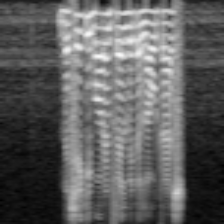

In [ ]:
cv2_imshow(img.permute(1,2,0).cpu().numpy())

## Configuration

In [ ]:
class Config:

  output = 2

  num_workers=4
  batch_size=64

  n_epoches=100

  lr = 0.0003

  patience=3
  
  SchedulerClass = torch.optim.lr_scheduler.ReduceLROnPlateau
  scheduler_params = dict(
      mode='min',
      factor=0.8,
      patience=1,
      verbose=True, 
      threshold=0.0001,
      threshold_mode='abs',
      cooldown=0, 
      min_lr=1e-8,
      eps=1e-08
  )

In [ ]:
train_loss=dict()
valid_loss=dict()

class Engine:
    
    def __init__(self,model,device,config,fold,model_name='b0',image_size=224, weight_path='./'):
  
        self.model=model
        self.device=device
        self.config=config
        self.best_score=0
        self.best_loss=5000
        self.fold=fold
        self.model_name = model_name
        self.image_size = image_size
        self.weight_path = weight_path
        
        param_optimizer = list(self.model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
            {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ] 
        
        self.optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=config.lr)

        self.scheduler = config.SchedulerClass(self.optimizer, **config.scheduler_params)
        
        self.criterion = nn.CrossEntropyLoss().to(self.device)
        
    def fit(self,train_loader,validation_loader):
        for epoch in range(self.config.n_epoches):

            print("Training Started...")
            t=time.time()
            summary_loss = self.train_one_epoch(train_loader)
            train_loss[epoch] = summary_loss.avg

            print('Train : Epoch {:03}: | Summary Loss: {:.3f} | Training time: {}'.format(epoch,summary_loss.avg,time.time() - t))
            
            t=time.time()
            print("Validation Started...")
            summary_loss = self.validation(validation_loader)
            valid_loss[epoch] = summary_loss.avg

            print('Valid : Epoch {:03}: | Summary Loss: {:.3f} | Training time: {}'.format(epoch,summary_loss.avg,time.time() - t))
            
            self.scheduler.step(metrics=summary_loss.avg)
            
            if not self.best_score:
                self.best_score = summary_loss.avg  # So any validation roc_auc we have is the best one for now
                print('Saving model with best val as {}'.format(self.best_score))
                self.model.eval()   
                patience = self.config.patience
                torch.save({'model_state_dict': self.model.state_dict(),'best_score': self.best_score, 'epoch': epoch},  f"{self.weight_path}/{self.image_size}_{self.model_name}_{self.fold}.pt")
                continue  

            if summary_loss.avg <= self.best_score:
                self.best_score = summary_loss.avg
                patience = self.config.patience  # Resetting patience since we have new best validation accuracy
                print('Imporved model with best val as {}'.format(self.best_score))
                torch.save({'model_state_dict': self.model.state_dict(),'best_score': self.best_score, 'epoch': epoch},  f"{self.weight_path}/{self.image_size}_{self.model_name}_{self.fold}.pt")
            else:
                patience -= 1
                print('Patience Reduced')
                if patience == 0:
                    print('Early stopping. Best Val roc_auc: {:.3f}'.format(self.best_score))
                    break
                    
    def validation(self, val_loader):
        self.model.eval()
        summary_loss = AverageMeter()

        t = time.time()

        for steps,(images, targets) in enumerate(tqdm_notebook(val_loader)):
            with torch.no_grad():
                targets = targets.to(self.device, dtype=torch.long)
                batch_size = images.shape[0]               
                images = images.to(self.device, dtype=torch.float32)
                outputs = self.model(images)
                loss = self.criterion(outputs, targets)

                summary_loss.update(loss.detach().item(), batch_size)

        return summary_loss


    def train_one_epoch(self, train_loader):
        self.model.train()

        summary_loss = AverageMeter()

        t = time.time()

        for steps,(images, targets) in enumerate(tqdm_notebook(train_loader)):
            targets = targets.to(self.device, dtype=torch.long)
            batch_size = images.shape[0]               
            images = images.to(self.device, dtype=torch.float32)

            self.optimizer.zero_grad()
            outputs = self.model(images)

            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()

            summary_loss.update(loss.detach().item(), batch_size)

        return summary_loss

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
df.head(2)

,Name,Label,k-fold,Label_enc
0,hyd_502_long_144_hin_1.wav,hi,0,0
1,blr_8_long_165_eng_3.wav,in-en,0,1


In [ ]:
def perform_for_fold(fold_number=0, model_name='b0', image_size=192, weight_path='./', load_weights_path=None):
  
  train_X = df[df["k-fold"] != fold_number].Name.values
  train_enc = df[df["k-fold"] != fold_number].Label.values
  train_Y = df[df["k-fold"] != fold_number].Label_enc.values

  valid_X = df[df["k-fold"] == fold_number].Name.values
  valid_enc = df[df["k-fold"] == fold_number].Label.values
  valid_Y = df[df["k-fold"] == fold_number].Label_enc.values

  train_dataset = DatasetRetriever(train_X, train_enc, train_Y,True, augmentations(img_size = image_size))
  valid_dataset = DatasetRetriever(valid_X, valid_enc, valid_Y,False, augmentations(img_size = image_size))

  train_loader = torch.utils.data.DataLoader(
            train_dataset,
            sampler=BalanceClassSampler(labels=train_dataset.get_labels(), mode="downsampling"),
            #sampler=RandomSampler(train_dataset),
            batch_size=Config.batch_size,
            pin_memory=False,
            drop_last=True,
            num_workers=Config.num_workers,
        )
        
  validation_loader = torch.utils.data.DataLoader(
            valid_dataset, 
            batch_size=Config.batch_size,
            num_workers=Config.num_workers,
            shuffle=False,
            sampler=SequentialSampler(valid_dataset),
            pin_memory=False,
        ) 
  
  model = Net(model_name=model_name).cuda()
  if load_weights_path is not None:
    model.load_state_dict(torch.load(load_weights_path + f"{image_size}_{model_name}_{fold_number}.pt")["model_state_dict"]) 
    print("Weight Loaded")
  engine = Engine(model=model, device=torch.device('cuda'), config=Config, fold=fold_number, model_name=model_name, image_size=image_size, weight_path=weight_path)
  engine.fit(train_loader, validation_loader)

In [ ]:
perform_for_fold(fold_number=0, model_name='b0', image_size=192, weight_path="/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data")

Loaded pretrained weights for efficientnet-b0
Training Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Train : Epoch 000: | Summary Loss: 0.423 | Training time: 6105.723812580109
Validation Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Valid : Epoch 000: | Summary Loss: 0.270 | Training time: 1354.5919697284698
Saving model with best val as 0.2701367220835882
Training Started...



Train : Epoch 001: | Summary Loss: 0.283 | Training time: 2025.4990735054016
Validation Started...



Valid : Epoch 001: | Summary Loss: 0.218 | Training time: 1018.7388575077057
Imporved model with best val as 0.21773940057786925
Training Started...



Train : Epoch 002: | Summary Loss: 0.221 | Training time: 2069.008656978607
Validation Started...



Valid : Epoch 002: | Summary Loss: 0.143 | Training time: 1013.8568890094757
Imporved model with best val as 0.14296666373247566
Training Started...


In [ ]:
perform_for_fold(fold_number=0, model_name='b0', image_size=192, weight_path="/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data", load_weights_path="/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/")

Loaded pretrained weights for efficientnet-b0
Weight Loaded
Training Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Train : Epoch 000: | Summary Loss: 0.173 | Training time: 2958.0427265167236
Validation Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Valid : Epoch 000: | Summary Loss: 0.127 | Training time: 834.7915070056915
Saving model with best val as 0.12740148178563282
Training Started...



Train : Epoch 001: | Summary Loss: 0.129 | Training time: 1557.780662536621
Validation Started...



Valid : Epoch 001: | Summary Loss: 0.160 | Training time: 603.9538314342499
Patience Reduced
Training Started...



Train : Epoch 002: | Summary Loss: 0.104 | Training time: 1520.7217316627502
Validation Started...



Valid : Epoch 002: | Summary Loss: 0.120 | Training time: 534.7040975093842
Imporved model with best val as 0.12031510086764073
Training Started...



Train : Epoch 003: | Summary Loss: 0.141 | Training time: 1482.503220796585
Validation Started...



Valid : Epoch 003: | Summary Loss: 0.148 | Training time: 572.1061224937439
Patience Reduced
Training Started...



Train : Epoch 004: | Summary Loss: 0.124 | Training time: 1476.1585755348206
Validation Started...



Valid : Epoch 004: | Summary Loss: 0.096 | Training time: 575.8658850193024
Imporved model with best val as 0.09562322714647689
Training Started...



Train : Epoch 005: | Summary Loss: 0.110 | Training time: 1439.2885506153107
Validation Started...


In [ ]:
!nvidia-smi

Mon Apr  5 15:31:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
perform_for_fold(fold_number=0, model_name='b0', image_size=192, weight_path="/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data", load_weights_path="/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/")

Loaded pretrained weights for efficientnet-b0
Weight Loaded
Training Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Train : Epoch 000: | Summary Loss: 0.077 | Training time: 4427.4245800971985
Validation Started...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


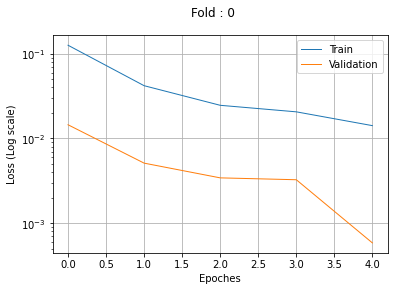

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(list(train_loss.keys()), list(train_loss.values()), linewidth=1, label="Train")
plt.plot(list(valid_loss.keys()), list(valid_loss.values()),  linewidth=1, label="Validation")
plt.suptitle('Fold : 0 ')
plt.xlabel('Epoches')
plt.ylabel('Loss (Log scale)')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

Inference on Clean Test set

In [ ]:

import os
import cv2

import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from efficientnet_pytorch import EfficientNet
import albumentations as A
from torch.utils.data.sampler import SequentialSampler
from albumentations.pytorch import ToTensorV2

In [ ]:
def Net(model_name = 'b0', output = 2):
    model = EfficientNet.from_pretrained(f'efficientnet-{model_name}')
    model._fc = nn.Linear(in_features = model._fc.in_features, out_features = output, bias = True)
    return model

def load_model(path):
  model = Net().cuda()
  model.load_state_dict(torch.load(path)["model_state_dict"])
  model.eval()
  return model

In [ ]:

import albumentations as A
from albumentations.pytorch import ToTensorV2

def augmentations(img_size):
    return A.Compose([
            A.Resize(height=img_size, width=img_size, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)
    
class IDatasetRetriever(Dataset):

    def __init__(self, audio_ids, labels, transforms=None):
        super().__init__()
        self.audio_ids = audio_ids
        self.labels = labels
        self.transforms = transforms

    def __getitem__(self, idx: int):
        audio_id = self.audio_ids[idx]
        label = self.labels[idx]
        audio_path = f"{BASE}/{label}/{audio_id}"
        audio_data = load_audio(audio_path)

        audio_spec = get_spectogram(audio_data)

        if self.transforms:
          sample = {'image': audio_spec}
          sample = self.transforms(**sample)
          audio_spec = sample['image']

        return audio_id, audio_spec, label

    def __len__(self) -> int:
        return self.audio_ids.shape[0]

    def get_labels(self):
        return list(self.labels)

In [ ]:
class Config:
  num_workers=1
  batch_size=64

In [ ]:
from tqdm import tqdm_notebook
class Engine:

  def __init__(self, fold):
    
    self.predictions = list()
    self.names = list()
    self.truelbl = list()
    self.model = load_model(f'/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/192_b0_{fold}.pt')
    print(f'Model loaded for fold {fold}')
  
  def fit(self, validation_loader):
    for name, x_val, label in tqdm_notebook(validation_loader):
      
      temp = list()
      images = x_val.to(torch.device('cuda'), dtype=torch.float32)
      
      pred = self.model(images)
      y_pred = nn.functional.softmax(pred, dim=1).data.cpu().numpy()

      for each_pred in y_pred:
        temp.append(each_pred.argmax())
      self.names.extend(name)
      self.predictions.extend(temp)
      self.truelbl.extend(label)
    return self.predictions, self.names, self.truelbl

In [ ]:
def perform_for_fold(fold_number=0):
  X_test = pd.read_csv("/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/X_test.csv")
  #test_X = np.asarray(["0.wav", "1.wav", "2.wav", "3.wav", "4.wav", "5.wav", "6.wav", "7.wav","8.wav" ,"9.wav"])
  name = X_test.Name.values
  lbl = X_test.Label.values
  I_dataset = IDatasetRetriever(name,lbl, augmentations(img_size = 192))
        
  I_loader = torch.utils.data.DataLoader(
            I_dataset, 
            batch_size=Config.batch_size,
            num_workers=Config.num_workers,
            shuffle=False,
            sampler=SequentialSampler(I_dataset),
            pin_memory=False,
        ) 
  
  engine = Engine(fold_number)
  pred, names, lbl = engine.fit(I_loader)
  return pred, names, lbl 

In [ ]:
pred, names, truelbl = perform_for_fold()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


KeyboardInterrupt: ignored

In [ ]:
truelbl[2]

'en-in'

In [ ]:
temp = list()
for each in truelbl:
  if each=="en-in":
    temp.extend([0])
  if each=="hi":
    temp.extend([1])

In [ ]:
len(temp), len(pred)

(1802, 1802)

In [ ]:
pred[0], truelbl[0]

(0, 'en-in')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(temp, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1239
           1       1.00      1.00      1.00       563

    accuracy                           1.00      1802
   macro avg       1.00      1.00      1.00      1802
weighted avg       1.00      1.00      1.00      1802



## Inference


In [ ]:
1 hindi , 0 eng

In [ ]:

import os
import cv2

import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from efficientnet_pytorch import EfficientNet
import albumentations as A
from torch.utils.data.sampler import SequentialSampler
from albumentations.pytorch import ToTensorV2

In [ ]:
def Net(model_name = 'b0', output = 2):
    model = EfficientNet.from_pretrained(f'efficientnet-{model_name}')
    model._fc = nn.Linear(in_features = model._fc.in_features, out_features = output, bias = True)
    return model

In [ ]:
def load_model(path):
  model = Net().cuda()
  model.load_state_dict(torch.load(path)["model_state_dict"])
  model.eval()
  return model

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

def augmentations(img_size):
    return A.Compose([
            A.Resize(height=img_size, width=img_size, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)
    
class TestDatasetRetriever(Dataset):

    def __init__(self, audio_ids, transforms=None):
        super().__init__()
        self.audio_ids = audio_ids
        self.transforms =transforms

    def __getitem__(self, idx: int):
        audio_id = self.audio_ids[idx]
        audio_path = f"{TEST_BASE}/{audio_id}"
        audio_data = load_audio(audio_path)
        #audio_data = train_transform(audio_data)
        audio_spec = get_spectogram(audio_data)

        if self.transforms:
          sample = {'image': audio_spec}
          sample = self.transforms(**sample)
          audio_spec = sample['image']

        return audio_id, audio_spec

    def __len__(self) -> int:
        return self.audio_ids.shape[0]

    def get_labels(self):
        return list(self.labels)

In [ ]:

class Config:
  num_workers=1
  batch_size=1

In [ ]:
class Engine:

  def __init__(self, fold):
    
    self.predictions = list()
    self.names = list()
    self.model = load_model(f'/content/drive/MyDrive/Language Identification/IIT data for LI- ASR (ENG&HI)/data/192_b0_{fold}.pt')
    print(f'Model loaded for fold {fold}')
  
  def fit(self, validation_loader):
    for name, x_val in validation_loader:
      
      temp = list()
      images = x_val.to(torch.device('cuda'), dtype=torch.float32)
      
      pred = self.model(images)
      y_pred = nn.functional.softmax(pred, dim=1).data.cpu().numpy()

      for each_pred in y_pred:
        temp.append(each_pred.argmax())
      self.names.extend(name)
      self.predictions.extend(temp)
    return self.predictions, self.names

In [ ]:
def perform_for_fold(test_X, fold_number=0):
  
  #test_X = np.asarray(["0.wav", "1.wav", "2.wav", "3.wav", "4.wav", "5.wav", "6.wav", "7.wav","8.wav" ,"9.wav"])
  Test_dataset = TestDatasetRetriever(test_X, augmentations(img_size = 192))
        
  test_loader = torch.utils.data.DataLoader(
            Test_dataset, 
            batch_size=Config.batch_size,
            num_workers=Config.num_workers,
            shuffle=False,
            sampler=SequentialSampler(Test_dataset),
            pin_memory=False,
        ) 
  
  engine = Engine(fold_number)
  pred, names = engine.fit(test_loader)
  return pred, names 

In [ ]:
import numpy as np

TEST_BASE = "/content/hi1"
a = np.asarray(os.listdir("/content/hi1"))
pred, names = perform_for_fold(a)

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0


In [ ]:
for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

File name : 0.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/h2"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0


In [ ]:
for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

File name : 0.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/h3"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0
File name : 0.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/h4"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0
File name : 0.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/e1"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0
File name : 0.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/e2"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0
File name : 0.wav Prediciton : 0
File name : 2.wav Prediciton : 1
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/e3"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=606
  n_fft, y.shape[-1]


File name : 4.wav Prediciton : 1
File name : 0.wav Prediciton : 0
File name : 3.wav Prediciton : 0
File name : 2.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/e4"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0
File name : 0.wav Prediciton : 0
File name : 3.wav Prediciton : 0
File name : 2.wav Prediciton : 0
File name : 1.wav Prediciton : 0


In [ ]:
TEST_BASE = "/content/ee"
a = np.asarray(os.listdir(TEST_BASE))
pred, names = perform_for_fold(a)

Loaded pretrained weights for efficientnet-b0
Model loaded for fold 0


In [ ]:
for i, j in zip(pred, names):
  print(f"File name : {j} Prediciton : {i}")

File name : 12.wav Prediciton : 0
File name : 33.wav Prediciton : 1
File name : 5.wav Prediciton : 0
File name : 44.wav Prediciton : 0
File name : 7.wav Prediciton : 1
File name : 10.wav Prediciton : 1
File name : 31.wav Prediciton : 0
File name : 19.wav Prediciton : 0
File name : 32.wav Prediciton : 1
File name : 40.wav Prediciton : 0
File name : 27.wav Prediciton : 1
File name : 35.wav Prediciton : 1
File name : 11.wav Prediciton : 0
File name : 49.wav Prediciton : 0
File name : 16.wav Prediciton : 0
File name : 29.wav Prediciton : 1
File name : 45.wav Prediciton : 1
File name : 51.wav Prediciton : 0
File name : 23.wav Prediciton : 1
File name : 8.wav Prediciton : 1
File name : 4.wav Prediciton : 0
File name : 28.wav Prediciton : 1
File name : 30.wav Prediciton : 0
File name : 15.wav Prediciton : 0
File name : 6.wav Prediciton : 0
File name : 36.wav Prediciton : 0
File name : 43.wav Prediciton : 0
File name : 50.wav Prediciton : 0
File name : 48.wav Prediciton : 0
File name : 42.wav 

{"hi": 0, "in-en": 1}
